In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MaxAbsScaler

import json
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

In [2]:
df = pd.read_csv('phl_exoplanet_catalog_2019.csv')
df.head()

P_NAME  P_STATUS      P_MASS  P_MASS_ERROR_MIN  P_MASS_ERROR_MAX  \
0    11 Com b       3.0  6165.86330        -476.74200         476.74200   
1    11 UMi b       3.0  4684.78480        -794.57001         794.57001   
2    14 And b       3.0  1525.57440               NaN               NaN   
3    14 Her b       3.0  1481.07850         -47.67420          47.67420   
4  16 Cyg B b       3.0   565.73385         -25.42624          25.42624   

   P_RADIUS  P_RADIUS_ERROR_MIN  P_RADIUS_ERROR_MAX  P_YEAR   P_UPDATED  ...  \
0       NaN                 NaN                 NaN    2007  2014-05-14  ...   
1       NaN                 NaN                 NaN    2009  2018-09-06  ...   
2       NaN                 NaN                 NaN    2008  2014-05-14  ...   
3       NaN                 NaN                 NaN    2002  2018-09-06  ...   
4       NaN                 NaN                 NaN    1996  2018-09-06  ...   

   P_HABZONE_CON  P_TYPE_TEMP  P_HABITABLE     P_ESI  S_CONSTELLATION  \
0              0          Hot            0  0.083813   Coma Berenices   
1              0          Hot            0  0.082414       Ursa Minor   
2              0          Hot            0  0.081917        Andromeda   
3              0         Cold            0  0.145241         Hercules   
4              1         Warm            0  0.368627           Cygnus   

   S_CONSTELLATION_ABR  S_CONSTELLATION_ENG  P_RADIUS_EST  P_MASS_EST  \
0                  Com      Berenice's Hair     12.082709  6165.86330   
1                  UMi          Little Bear     12.229641  4684.78480   
2                  And            Andromeda     12.848516  1525.57440   
3                  Her             Hercules     12.865261  1481.07850   
4                  Cyg                 Swan     13.421749   565.73385   

   P_SEMI_MAJOR_AXIS_EST  
0                   1.29  
1                   1.53  
2                   0.83  
3                   2.93  
4                   1.66  

[5 rows x 112 columns]

In [3]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Columns: 112 entries, P_NAME to P_SEMI_MAJOR_AXIS_EST
dtypes: float64(94), int64(4), object(14)
memory usage: 3.5+ MB


(4048, 112)

In [4]:
df.isnull().sum().sum()
# 453,376 total data points
# 149,723 null data points
# about 33.02% of our data is null values

149723

In [5]:
# we need to deal with all these null values
# https://git.txstate.edu/ML/2022Fall/blob/main/project/examples/FeatureSelectionAndModeling.ipynb
# method for dealing with null values

# data normalization might be needed for some of these values, such as p_mass, since the range of values is large
# this might cause our model to put more weight on planets with a larger mass (drowns out low mass planets data points)

In [6]:
df.fillna(df.mean(),inplace=True)

df.isnull().sum().sum()

/var/folders/xm/xp_mvznj0rs3thk9f6s1nx400000gn/T/ipykernel_20525/1673558777.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(),inplace=True)


31494

In [7]:
df = df.dropna(axis = 1)
df.isnull().sum().sum()

0

In [8]:
df.shape
# Dropped all the columns that were unable to be given values, 19 columns were dropped

(4048, 101)

In [9]:
#   https://datascienceparichay.com/article/get-correlation-between-columns-of-pandas-dataframe/
#   we will find correlation between p_habitable and each matrix, rather than a corr_matrix of 112 columns 

<AxesSubplot:>

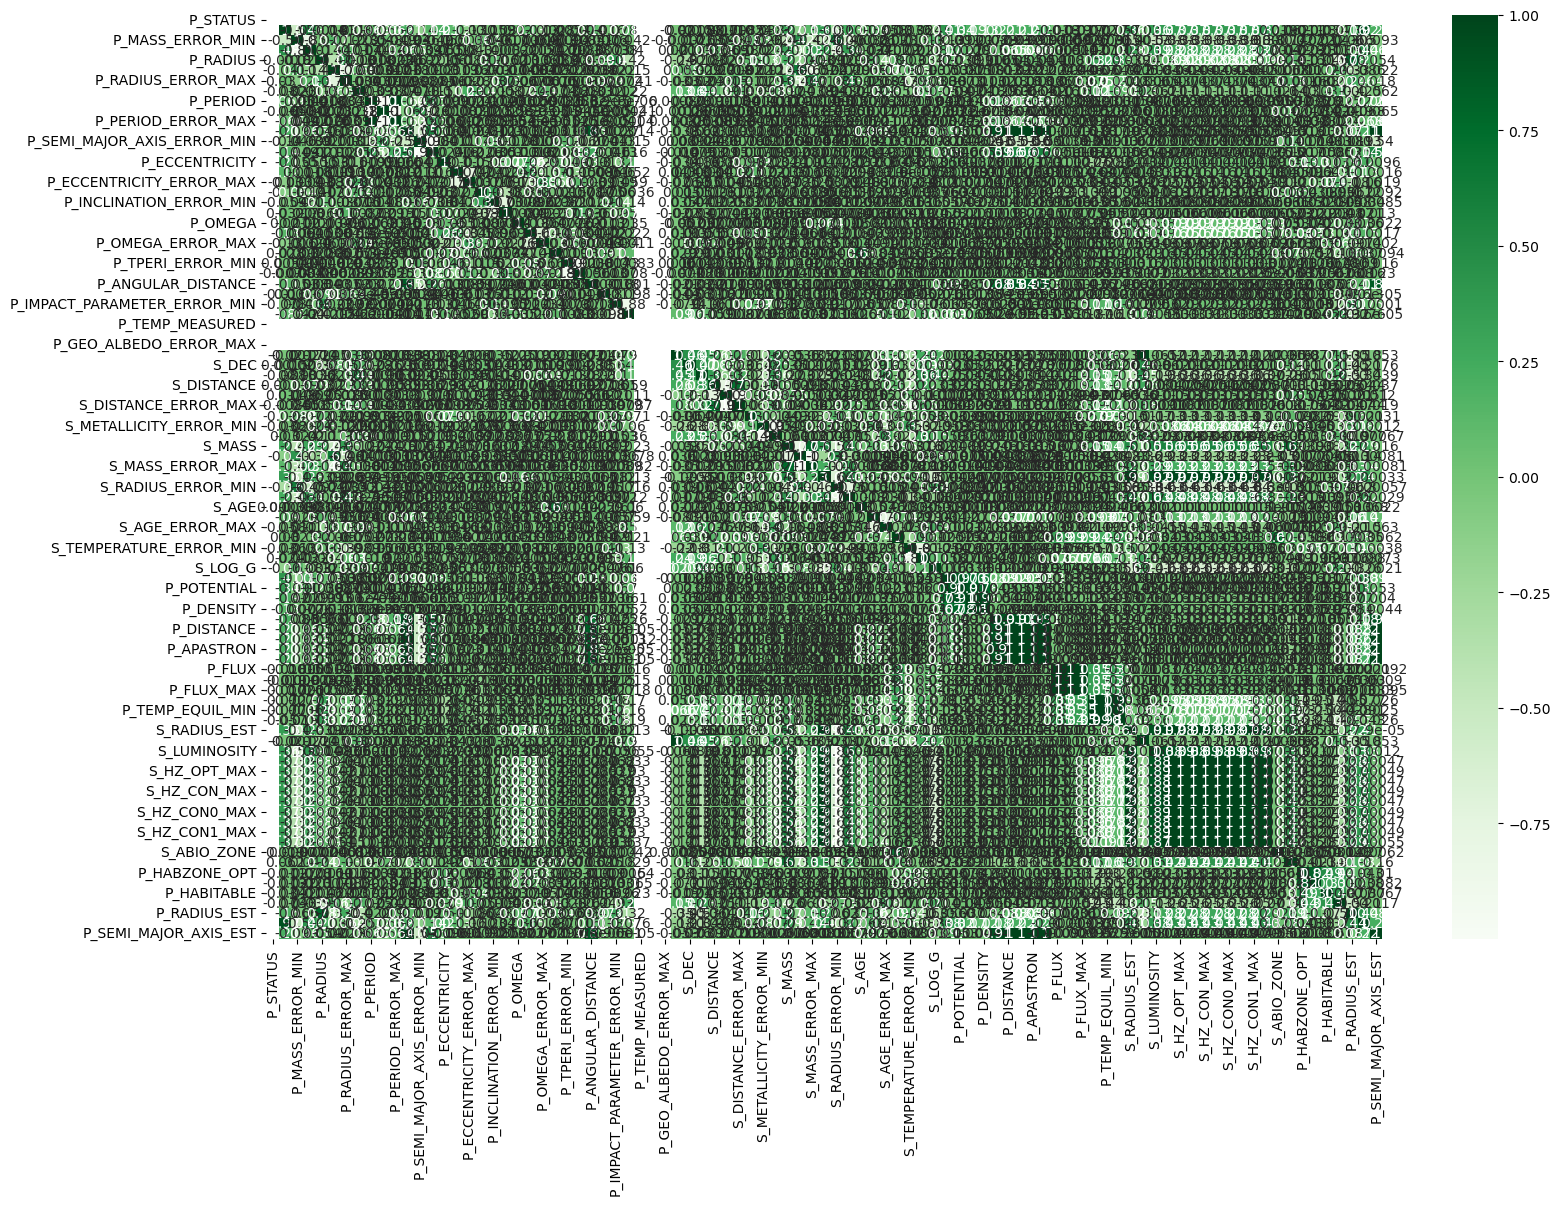

In [10]:
corr_matrix = df.corr()
plt.figure(figsize=(18,12))
sns.heatmap(corr_matrix, cmap = 'Greens', annot = True)

In [11]:
# the correlation matrix is too large to interpret, will need to run correlation between matricies individually

In [13]:
corr_habitable = corr_matrix['P_HABITABLE']
corr_habitable = corr_habitable.dropna()
corr_habitable = corr_habitable.abs()
corr_habitable = corr_habitable.drop('P_HABITABLE')
corr_habitable = corr_habitable.sort_values()

In [14]:
top10 = corr_habitable.tail(10)
top25 = corr_habitable.tail(25)

In [15]:
print(top10)

S_METALLICITY       0.092922
S_AGE               0.110499
S_TIDAL_LOCK        0.136728
P_TEMP_EQUIL_MIN    0.140296
P_TEMP_EQUIL        0.141131
P_TPERI             0.141285
P_TEMP_EQUIL_MAX    0.142674
P_HABZONE_CON       0.298875
P_ESI               0.427036
P_HABZONE_OPT       0.491481
Name: P_HABITABLE, dtype: float64


In [16]:
print(top25)

S_HZ_OPT_MAX                0.049386
S_HZ_CON1_MAX               0.049387
S_HZ_CON0_MAX               0.049387
S_HZ_CON_MAX                0.049387
P_OMEGA_ERROR_MAX           0.049910
S_DISTANCE                  0.051299
S_HZ_CON0_MIN               0.051827
S_HZ_CON1_MIN               0.051897
S_HZ_CON_MIN                0.051900
S_HZ_OPT_MIN                0.051901
S_SNOW_LINE                 0.055036
P_ECCENTRICITY_ERROR_MAX    0.074497
P_RADIUS_EST                0.076826
S_MASS                      0.083176
S_TEMPERATURE               0.090243
S_METALLICITY               0.092922
S_AGE                       0.110499
S_TIDAL_LOCK                0.136728
P_TEMP_EQUIL_MIN            0.140296
P_TEMP_EQUIL                0.141131
P_TPERI                     0.141285
P_TEMP_EQUIL_MAX            0.142674
P_HABZONE_CON               0.298875
P_ESI                       0.427036
P_HABZONE_OPT               0.491481
Name: P_HABITABLE, dtype: float64


In [17]:
subset = df[["P_MASS","P_ECCENTRICITY", "P_OMEGA", "P_TPERI", "S_RA", "S_DEC", "S_MAG", "S_DISTANCE", "S_METALLICITY", "S_MASS", "S_RADIUS", "S_AGE", "S_TEMPERATURE", "P_TEMP_EQUIL", "S_RADIUS_EST", "S_DISTANCE", "S_RA_H", "S_LUMINOSITY", "S_SNOW_LINE", "S_RA_H", "S_TIDAL_LOCK", "P_ESI", "P_RADIUS_EST", "P_HABITABLE"]]

In [18]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4048 entries, 0 to 4047
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   P_MASS          4048 non-null   float64
 1   P_ECCENTRICITY  4048 non-null   float64
 2   P_OMEGA         4048 non-null   float64
 3   P_TPERI         4048 non-null   float64
 4   S_RA            4048 non-null   float64
 5   S_DEC           4048 non-null   float64
 6   S_MAG           4048 non-null   float64
 7   S_DISTANCE      4048 non-null   float64
 8   S_METALLICITY   4048 non-null   float64
 9   S_MASS          4048 non-null   float64
 10  S_RADIUS        4048 non-null   float64
 11  S_AGE           4048 non-null   float64
 12  S_TEMPERATURE   4048 non-null   float64
 13  P_TEMP_EQUIL    4048 non-null   float64
 14  S_RADIUS_EST    4048 non-null   float64
 15  S_DISTANCE      4048 non-null   float64
 16  S_RA_H          4048 non-null   float64
 17  S_LUMINOSITY    4048 non-null   f

<AxesSubplot:>

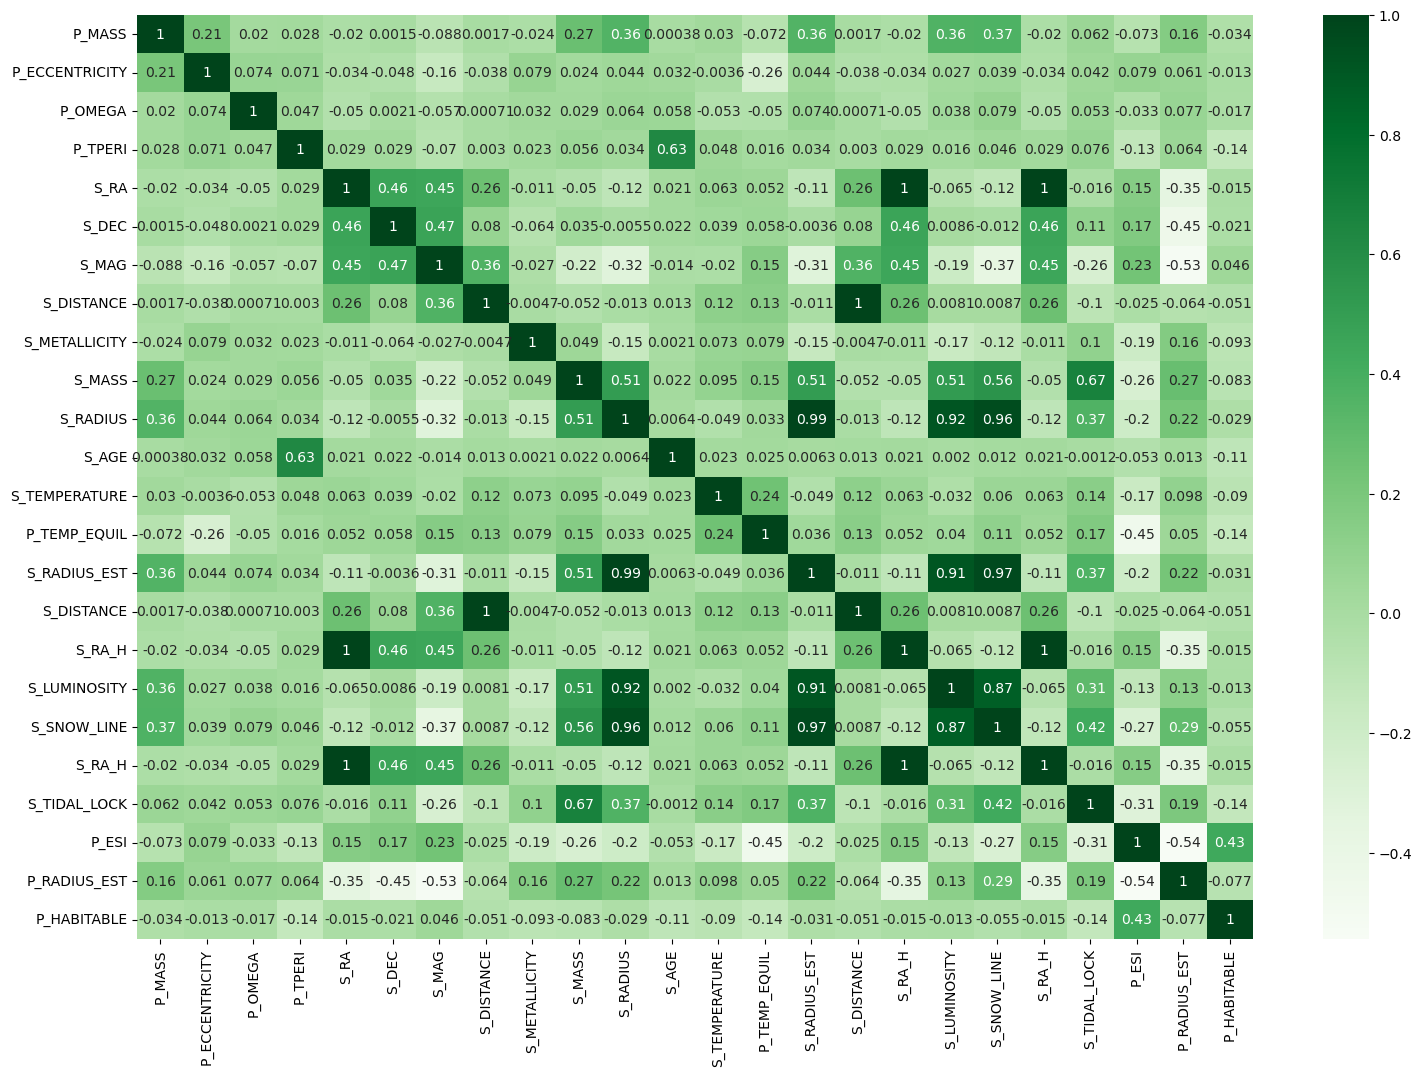

In [19]:
corr_matrix2 = subset.corr()
plt.figure(figsize=(18,12))
sns.heatmap(corr_matrix2, cmap = 'Greens', annot = True)

<AxesSubplot:>

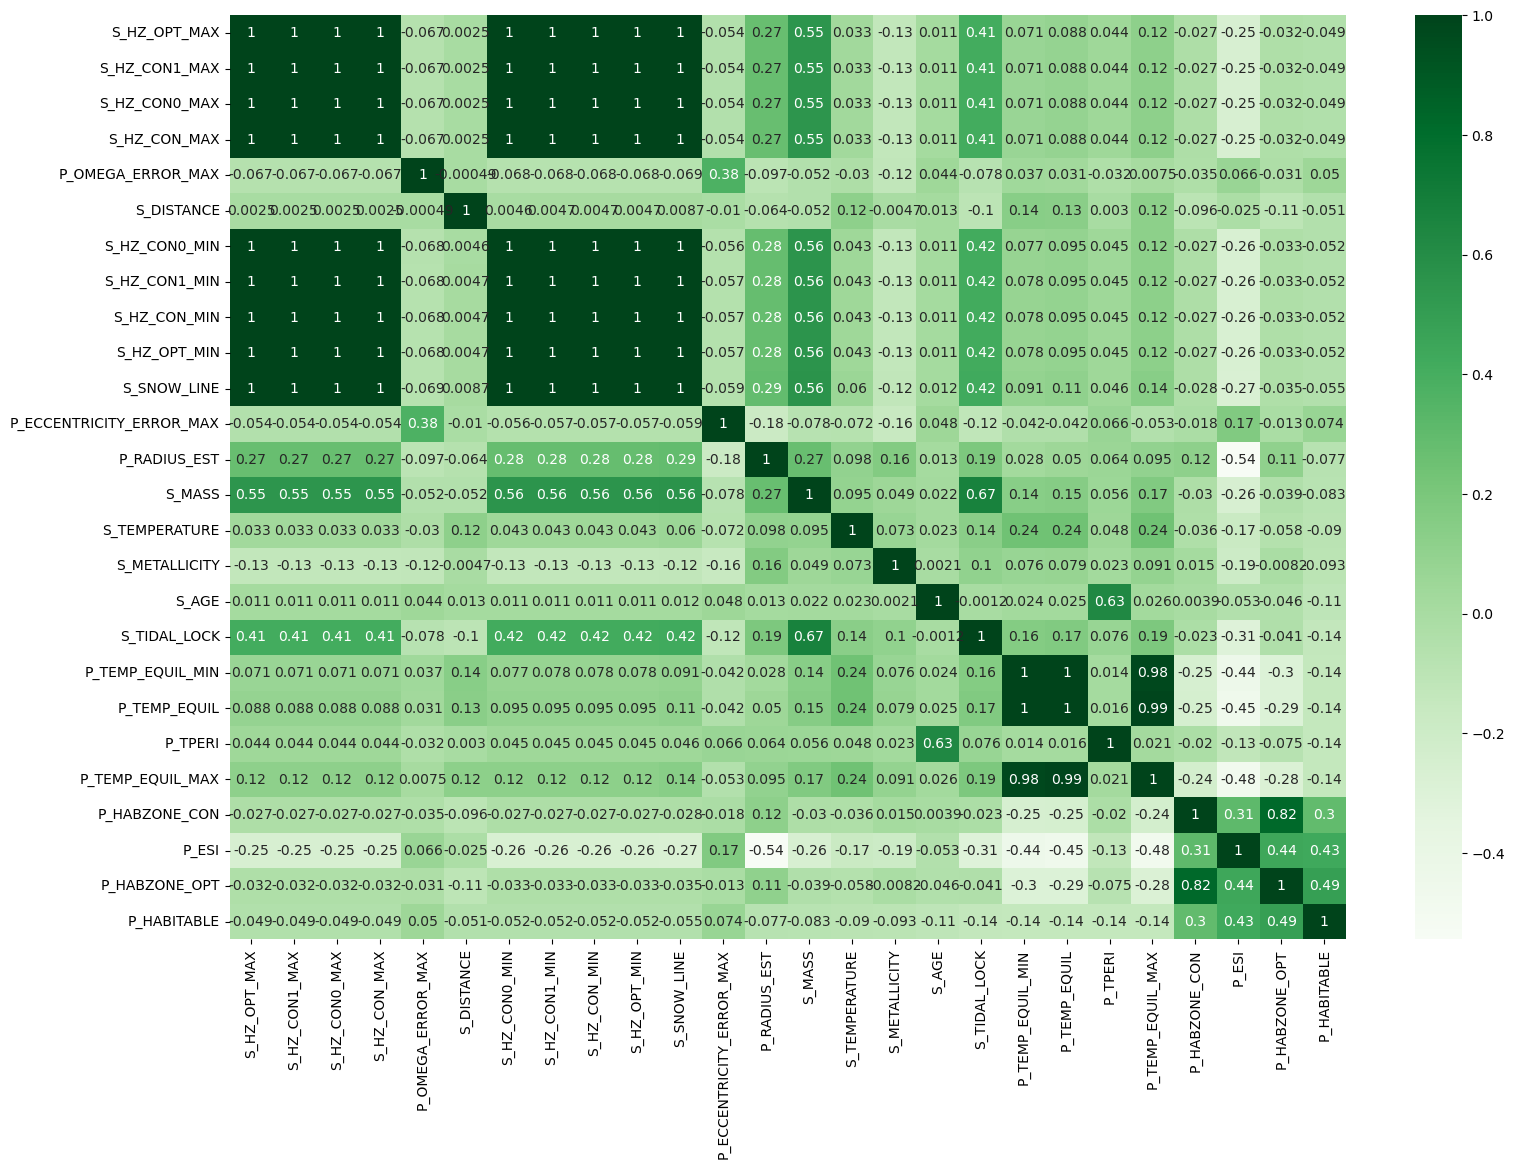

In [26]:
df_top25 = df[['S_HZ_OPT_MAX','S_HZ_CON1_MAX','S_HZ_CON0_MAX','S_HZ_CON_MAX','P_OMEGA_ERROR_MAX','S_DISTANCE',
               'S_HZ_CON0_MIN','S_HZ_CON1_MIN','S_HZ_CON_MIN','S_HZ_OPT_MIN','S_SNOW_LINE',
               'P_ECCENTRICITY_ERROR_MAX','P_RADIUS_EST','S_MASS','S_TEMPERATURE','S_METALLICITY','S_AGE',
               'S_TIDAL_LOCK','P_TEMP_EQUIL_MIN','P_TEMP_EQUIL','P_TPERI','P_TEMP_EQUIL_MAX','P_HABZONE_CON',        
               'P_ESI','P_HABZONE_OPT','P_HABITABLE']].copy()
corr_matrix3 = df_top25.corr()
plt.figure(figsize=(18,12))
sns.heatmap(corr_matrix3, cmap = 'Greens', annot = True)

In [27]:
df_top25.describe()

S_HZ_OPT_MAX  S_HZ_CON1_MAX  S_HZ_CON0_MAX  S_HZ_CON_MAX  \
count   4048.000000    4048.000000    4048.000000   4048.000000   
mean       2.369724       2.246710       2.246710      2.246710   
std        3.898505       3.696113       3.696113      3.696113   
min        0.001991       0.001887       0.001887      0.001887   
25%        1.232108       1.168150       1.168150      1.168150   
50%        1.760229       1.668857       1.668857      1.668857   
75%        2.369724       2.246710       2.246710      2.246710   
max       77.651759      73.620449      73.620449     73.620449   

       P_OMEGA_ERROR_MAX   S_DISTANCE  S_HZ_CON0_MIN  S_HZ_CON1_MIN  \
count        4048.000000  4048.000000    4048.000000    4048.000000   
mean           41.399581   631.067197       1.327826       1.211666   
std            20.909826   806.879393       2.099086       1.913314   
min             0.000000     1.300000       0.000989       0.000900   
25%            41.399581   158.390000       0.688835       0.628499   
50%            41.399581   481.000000       1.001186       0.913776   
75%            41.399581   864.732500       1.327826       1.211666   
max           354.300000  8500.000000      41.689213      37.995806   

       S_HZ_CON_MIN  S_HZ_OPT_MIN  ...         S_AGE  S_TIDAL_LOCK  \
count   4048.000000   4048.000000  ...  4.048000e+03   4048.000000   
mean       1.255196      0.990972  ... -2.114702e+06      0.440103   
std        1.981959      1.564722  ...  4.771603e+07      0.066876   
min        0.000932      0.000736  ... -2.147484e+09      0.030707   
25%        0.651041      0.513990  ... -2.114702e+06      0.431567   
50%        0.946585      0.747324  ...  2.000000e-03      0.440103   
75%        1.255196      0.990972  ...  4.070000e+00      0.462869   
max       39.358419     31.072681  ...  1.490000e+01      1.322542   

       P_TEMP_EQUIL_MIN  P_TEMP_EQUIL       P_TPERI  P_TEMP_EQUIL_MAX  \
count       4048.000000   4048.000000  4.048000e+03       4048.000000   
mean         793.683032    804.193202  2.429249e+06        824.937273   
std          440.580213    440.561371  8.584848e+04        443.343275   
min            2.688197      2.688197  0.000000e+00          2.688197   
25%          488.025017    496.869857  2.429249e+06        508.670425   
50%          779.363265    787.461780  2.429249e+06        798.610855   
75%         1009.901075   1020.259725  2.429249e+06       1037.714125   
max         7056.775700   7056.775700  2.464881e+06       7056.775700   

       P_HABZONE_CON        P_ESI  P_HABZONE_OPT  P_HABITABLE  
count    4048.000000  4048.000000    4048.000000  4048.000000  
mean        0.034091     0.261252       0.049654     0.021986  
std         0.181485     0.125915       0.217256     0.195731  
min         0.000000     0.006768       0.000000     0.000000  
25%         0.000000     0.209726       0.000000     0.000000  
50%         0.000000     0.262866       0.000000     0.000000  
75%         0.000000     0.299152       0.000000     0.000000  
max         1.000000     0.931208       1.000000     2.000000  

[8 rows x 26 columns]

In [36]:
scale_df = df.copy()
Scaler = StandardScaler()
Scaler.fit(scale_df)
Scaled_df = pd.DataFrame(Scaler.fit_transform(scale_df))

corr_matrix4 = Scaled_df.corr()

corr_habitable2 = corr_matrix4['P_HABITABLE']
corr_habitable2 = corr_habitable2.dropna()
corr_habitable2 = corr_habitable2.abs()
corr_habitable2 = corr_habitable2.drop('P_HABITABLE')
corr_habitable2 = corr_habitable2.sort_values()

top25 = corr_habitable.tail(25)
print(top25)

ValueError: could not convert string to float: '11 Com b'